In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [3]:
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df4.csv")
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,collision_no,year,month,day,hour,longitude,latitude,road_class,road_surface_cond,visibility,light,impact_type,involved_class,involved_injury_class,# involved,# injured,# KSI,# fatalities
0,1,2000,9,0,8,-79.456317,43.727732,Minor Arterial,DRY,CLEAR,DAYLIGHT,TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
1,1,2000,9,0,8,-79.456317,43.727732,Minor Arterial,DRY,CLEAR,DAYLIGHT,TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
2,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,PASSENGER,MINIMAL,1,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,PASSENGER,MINIMAL,1,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,VEHICLE OWNER,NONE,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334484,1038396,2019,5,4,22,-79.351940,43.677554,Major Arterial,DRY,CLEAR,"DARK, ARTIFICIAL",TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
2334485,1038396,2019,5,4,22,-79.351940,43.677554,Major Arterial,DRY,CLEAR,"DARK, ARTIFICIAL",TURNING MOVEMENT,PASSENGER,MINOR,1,1,0,0
2334486,1038397,2019,7,5,22,-79.314602,43.678378,Minor Arterial,WET,RAIN,"DARK, ARTIFICIAL",SMV UNATTENDED VEHICLE,DRIVER,NONE,1,0,0,0
2334487,1038398,2019,10,1,9,-79.372333,43.651519,Major Arterial,DRY,CLEAR,DAYLIGHT,PEDESTRIAN COLLISIONS,PEDESTRIAN,MINOR,1,1,0,0


In [4]:
df4.columns

Index(['collision_no', 'year', 'month', 'day', 'hour', 'longitude', 'latitude',
       'road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type',
       'involved_class', 'involved_injury_class', '# involved', '# injured',
       '# KSI', '# fatalities'],
      dtype='object')

In [5]:
# Features for the prediction of '# KSI'
features = list(df4.columns[2:13])       # NOT including: 'collision_no', 'year', 
#                                                         'involved_injury_class',
#                                                         '# involved', '# injured', '# KSI', '# fatalities'
features

['month',
 'day',
 'hour',
 'longitude',
 'latitude',
 'road_class',
 'road_surface_cond',
 'visibility',
 'light',
 'impact_type',
 'involved_class']

In [0]:
df4_n19 = df4[df4['year']!=2019]  # all years except 2019!!!

# Separating out the features 
x_display = df4_n19[features]
# Separating out the target
y_display = df4_n19['# KSI']

In [7]:
# Label Encoding

df4_n19_cat = df4_n19.copy()

df4_n19_cat[['road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type', 'involved_class']] = df4_n19_cat[['road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type', 'involved_class']].astype('category')

df4_n19_cat['road_class'] = df4_n19_cat['road_class'].cat.codes
df4_n19_cat['road_surface_cond'] = df4_n19_cat['road_surface_cond'].cat.codes
df4_n19_cat['visibility'] = df4_n19_cat['visibility'].cat.codes
df4_n19_cat['light'] = df4_n19_cat['light'].cat.codes
df4_n19_cat['impact_type'] = df4_n19_cat['impact_type'].cat.codes
df4_n19_cat['involved_class'] = df4_n19_cat['involved_class'].cat.codes

# Separating out the features 
x = df4_n19_cat[features]
# Separating out the target
y = df4_n19_cat['# KSI']

df4_n19_cat.head()

,collision_no,year,month,day,hour,longitude,latitude,road_class,road_surface_cond,visibility,light,impact_type,involved_class,involved_injury_class,# involved,# injured,# KSI,# fatalities
0,1,2000,9,0,8,-79.456317,43.727732,8,0,0,4,9,4,NONE,1,0,0,0
1,1,2000,9,0,8,-79.456317,43.727732,8,0,0,4,9,4,NONE,1,0,0,0
2,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,13,MINIMAL,1,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,13,MINIMAL,1,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,20,NONE,1,0,0,0


In [8]:
import plotly.graph_objects as go

y_value = [df4_n19[df4_n19['# KSI']==0].shape[0], df4_n19[df4_n19['# KSI']==1].shape[0]]
fig = go.Figure(data=[go.Bar(
    x = ['NOT KSI', 'KSI'], 
    y = y_value,
    text = [(i/df4_n19.shape[0])*100 for i in y_value],
    textposition = 'outside',
    texttemplate = '%{text:.1f}'+'%')])
fig.update_layout(title ='',
                  xaxis = dict(
                      title = ''), 
                  yaxis = dict(
                      title = 'Number of people involved in collisions'))
fig.show()

---
## **SHAP (SHapley Additive exPlanations)** 
---

In [9]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 11) (1819212,)
Test set: (454804, 11) (454804,)


In [0]:
x_display_train, x_display_test, y_display_train, y_display_test = train_test_split(x_display, y_display, test_size=0.2, random_state=27)

In [0]:
# from imblearn.over_sampling import SMOTENC

# sm_nc = SMOTENC(random_state=27, categorical_features=[5,6,7,8,9,10])
# x_train, y_train = sm_nc.fit_sample(x_train, y_train)

In [12]:
# Oversampling with ADASYN
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=27, ratio=1.0)
x_train, y_train = ad.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# # Standardizing the features
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)   # Fit on training set only
# x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier() # n_estimators=1000
model_GB.fit(x_train , y_train)
y_pred = model_GB.predict(x_test)

Accuracy:  0.9485932401649941


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

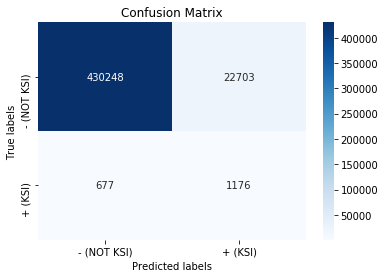

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

import seaborn as sns
import matplotlib.pyplot as plt  

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)']))

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      0.95      0.97    452951
     1 (KSI)       0.05      0.63      0.09      1853

    accuracy                           0.95    454804
   macro avg       0.52      0.79      0.53    454804
weighted avg       0.99      0.95      0.97    454804



In [17]:
!pip install shap

     |████████████████████████████████| 266kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383184 sha256=3c45dc536873ab078e0e6489256490ba192e347439931a43fac5da78c016f366
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [18]:
import shap

# Here we use the TreeSHAP implementation, an efficient estimation approach for tree-based models
explainer = shap.TreeExplainer(model_GB)
shap_values = explainer.shap_values(x)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


In [19]:
# print the JS visualization code to the notebook
shap.initjs()

# Visualize a single prediction
shap.force_plot(explainer.expected_value, shap_values[236000,:], x_display.iloc[236000,:])

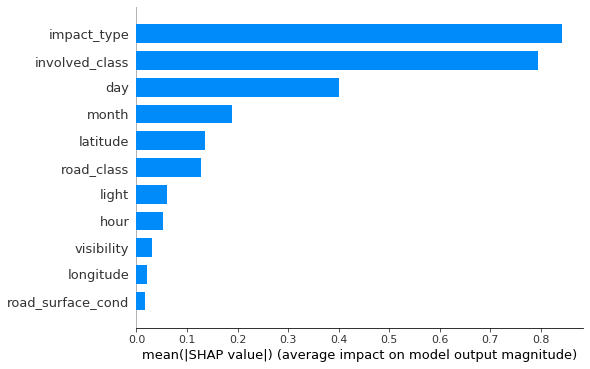

In [20]:
shap.summary_plot(shap_values, x, plot_type="bar")

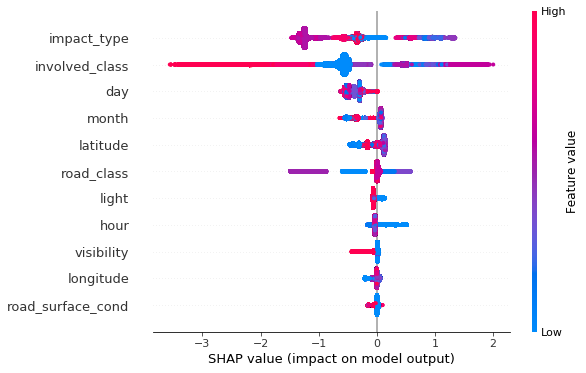

In [21]:
shap.summary_plot(shap_values, x)

In [22]:
shap_values_ind = shap.TreeExplainer(model_GB).shap_values(x)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


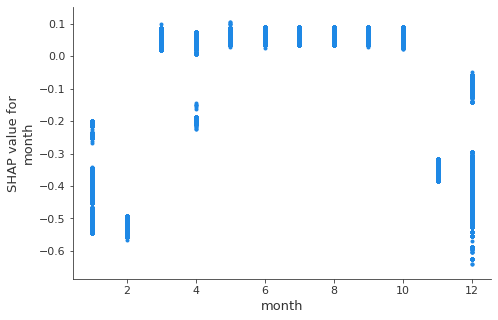

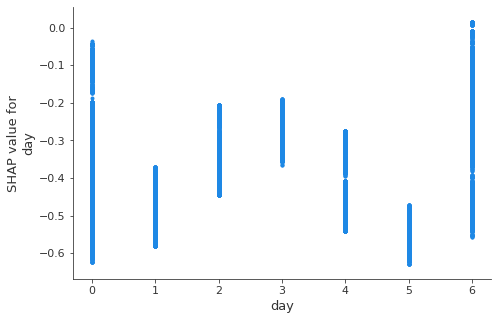

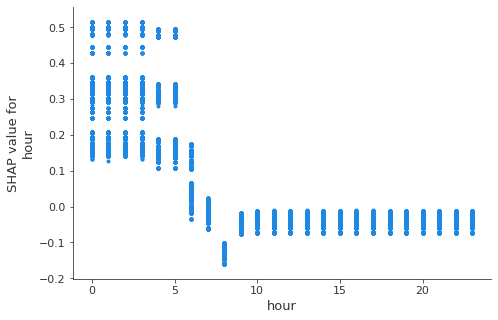

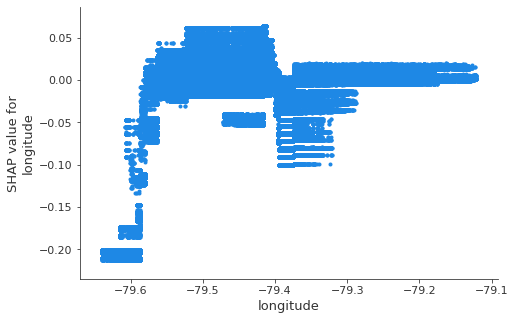

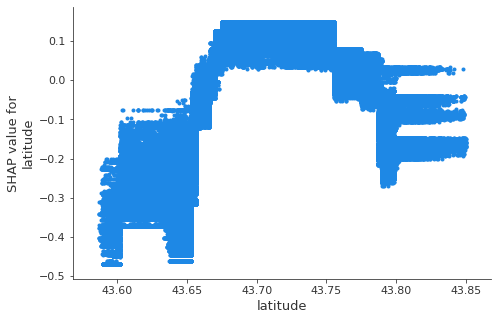

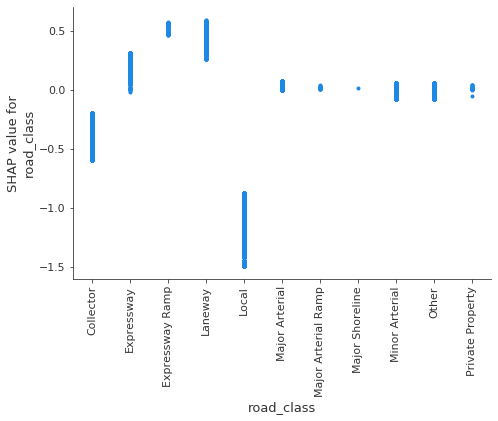

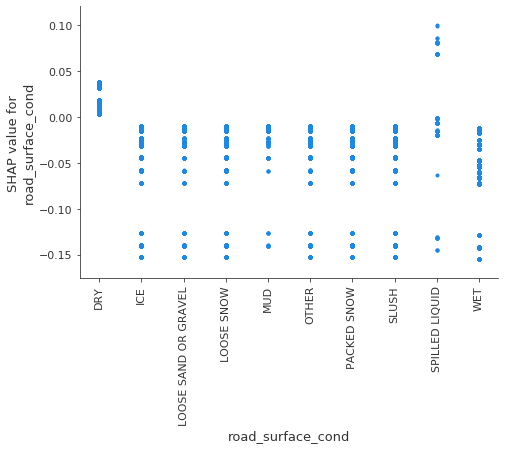

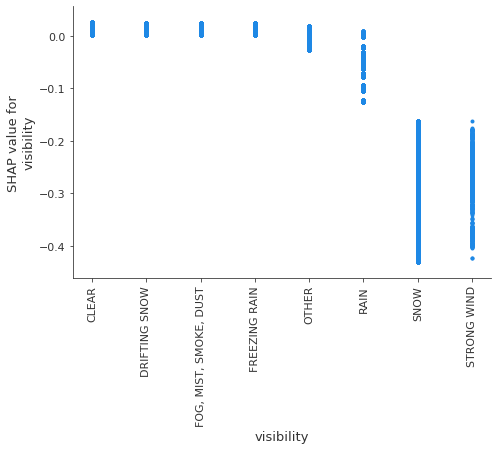

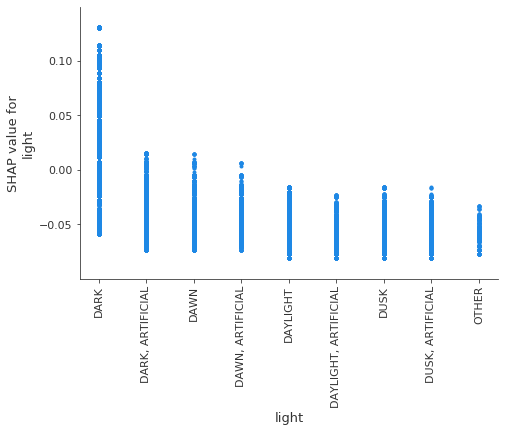

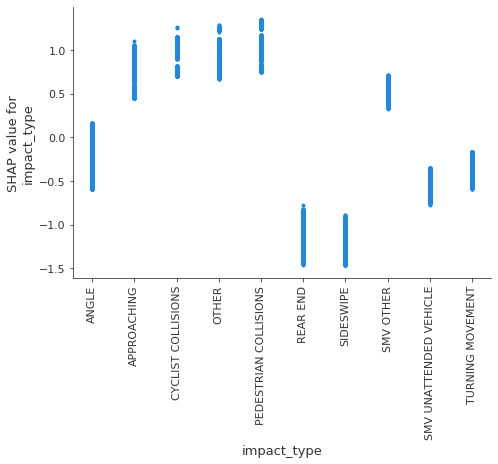

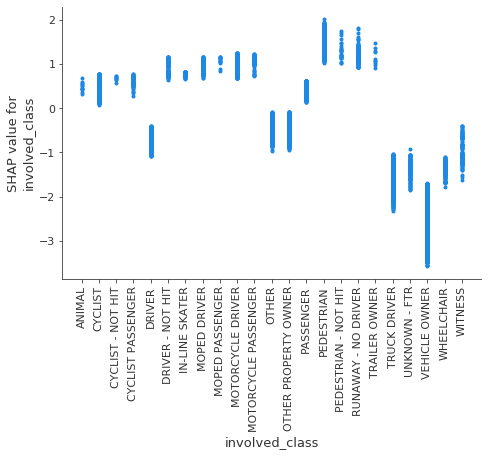

In [23]:
for feature in features:
  shap.dependence_plot(feature, shap_values, x, display_features=x_display, interaction_index=None)

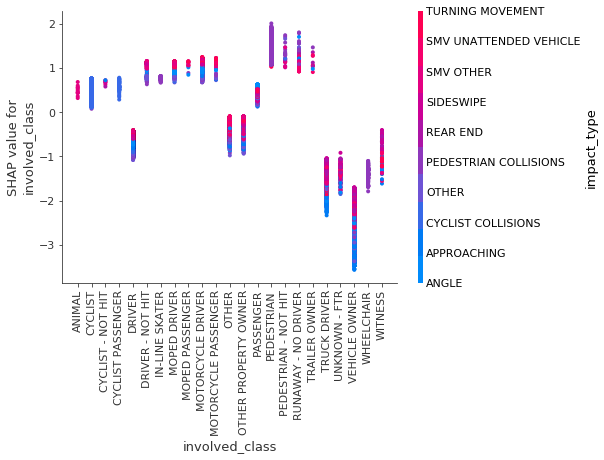

In [24]:
shap.dependence_plot("involved_class", shap_values, x, display_features=x_display, interaction_index='impact_type' )

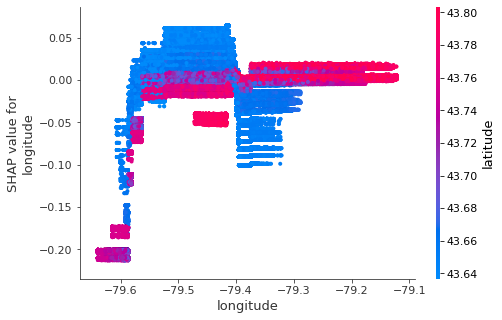

In [25]:
shap.dependence_plot("longitude", shap_values, x, display_features=x_display, interaction_index='latitude')

In [26]:
# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[:1000,:], x_display.iloc[:1000,:])